(300, 100, 100)
[0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
(array([0, 1, 2], dtype=int32), array([ 91,  98, 111]))


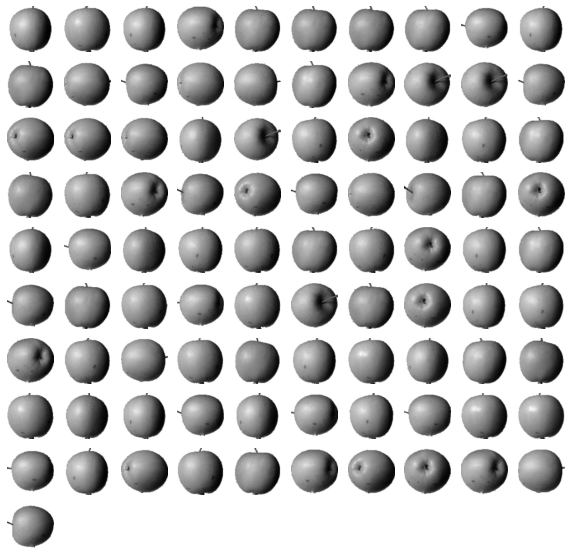

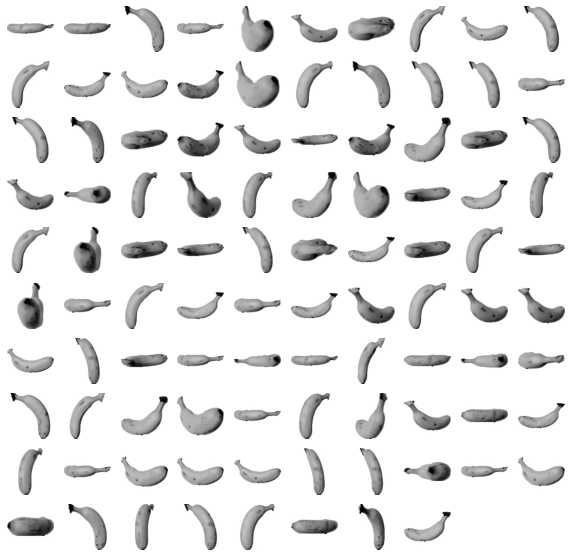

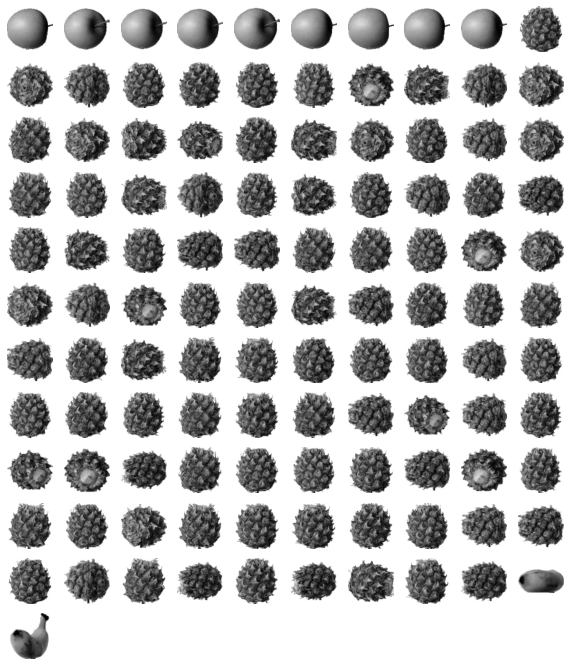

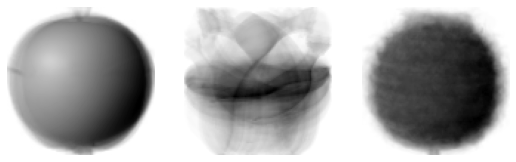

[[5267.70439881 8837.37750892 3393.8136117 ]]
[2]


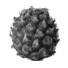

3


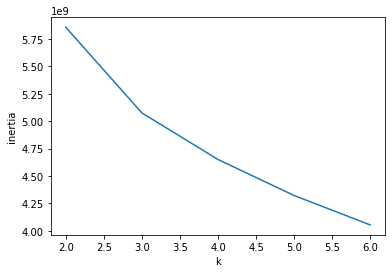

(50, 10000)


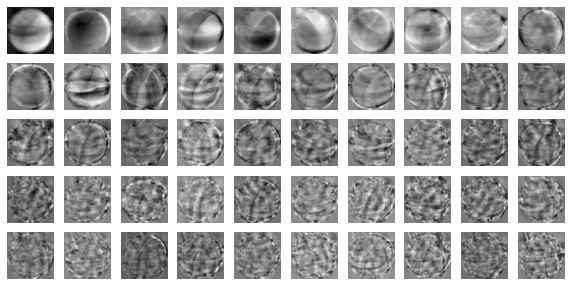

(300, 10000)
(300, 50)
[[1.06724881 1.0595981  1.08097011 ... 1.         1.         1.        ]
 [0.99170348 1.01045388 1.02297431 ... 1.         1.         1.        ]
 [1.05985704 1.06410043 1.08176624 ... 1.         1.         1.        ]
 ...
 [1.00648303 0.91629755 0.96405299 ... 1.         1.         1.        ]
 [0.6306523  0.94543273 0.74364303 ... 1.         1.         1.        ]
 [1.03207322 0.95041784 0.98666404 ... 1.         1.         1.        ]]


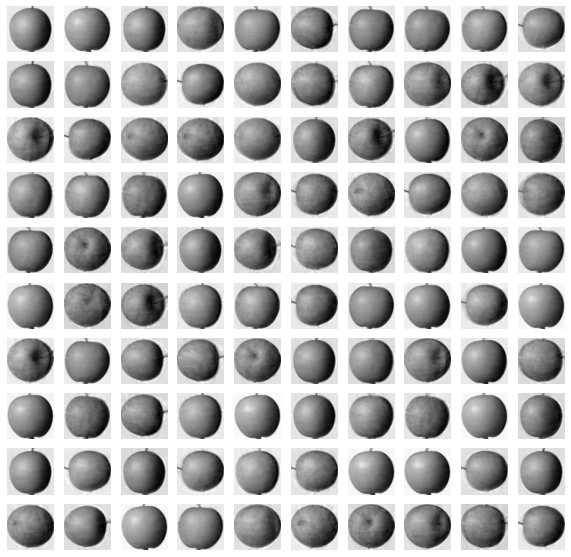

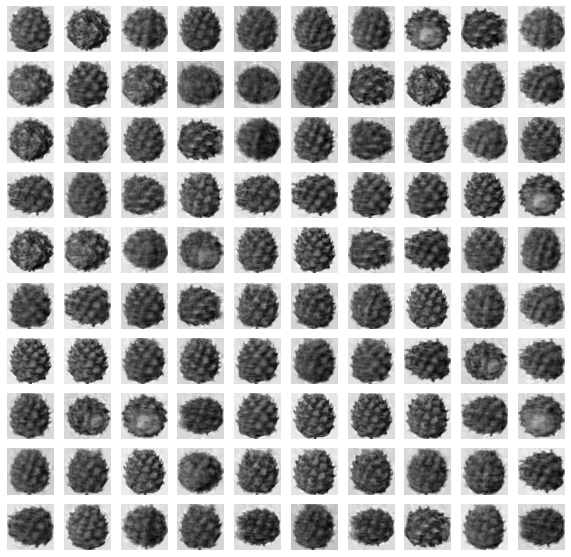

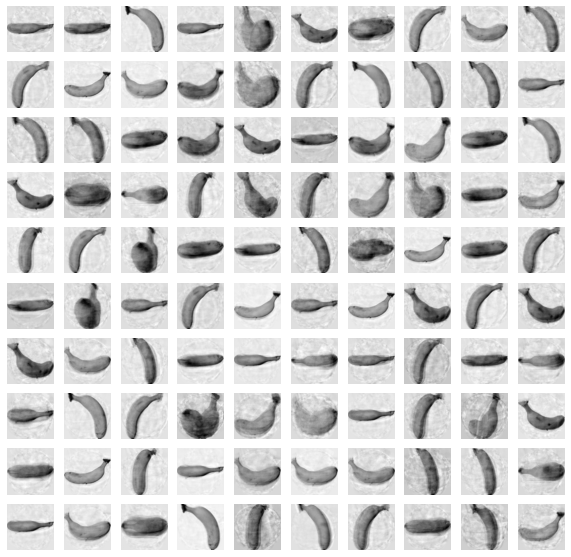



0.9214188754733352
0.9966666666666667
1.5970318794250489
1.0
0.05135488510131836
2
(300, 2)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9933333333333334
0.06819267272949218
(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))


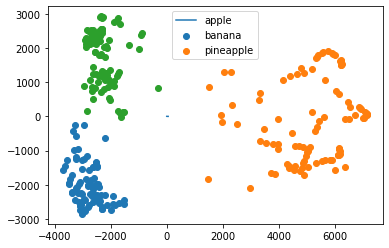

In [16]:
#하나의 점을 정하고, 그 주위에 있는 것들을 clustering 한다.
#하이퍼파라메터 k=3

#!wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)
print(fruits.shape)

#KMeans는 원형 형태의 모양일때에 잘 찾는다.
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42) #default, n_iter_=10 수행
km.fit(fruits_2d)
print(km.labels_)

print(np.unique(km.labels_, return_counts=True))

def draw_fruits(arr, ratio=1):
  n = len(arr)

  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10

  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

draw_fruits(fruits[km.labels_==0])
draw_fruits(fruits[km.labels_==1])
draw_fruits(fruits[km.labels_==2])

draw_fruits(km.cluster_centers_.reshape(-1,100,100), ratio=3)

print(km.transform(fruits_2d[100:101]))

print(km.predict(fruits_2d[100:101]))

draw_fruits(fruits[100:101])

print(km.n_iter_)


#최적의 k 찾기
inertia = []
for k in range(2,7):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)

plt.plot(range(2,7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

#dimensionality reduction

#principal component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

print(pca.components_.shape)

draw_fruits(pca.components_.reshape(-1,100,100))

print(fruits_2d.shape)

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse)

fruits_reconstruct = fruits_inverse.reshape(-1,100,100)

for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

print(np.sum(pca.explained_variance_ratio_))

plt.plot(pca.explained_variance_ratio_)



from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

lr = LogisticRegression()
target = np.array([0]*100+[1]*100+[2]*100)
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components_)

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))



km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])

plt.legend(['apple', 'banana', 'pineapple'])
plt.show()
